In [1]:
from robot.model import Robot
from utils.camera import Camera


In [2]:
robot = Robot("COM13")

Comando enviado: 0:80, 1:130, 2:0, 3:100
Comando enviado: 0:80, 1:130, 2:0, 3:100


O Axis 0 varia apenas a rotação do braço, dessa forma, podemos assumir que em todos podemos variar de 0 a 179, pois não há risco do robô espatifar
O Axis 1 Na posição inicial, ariando apenas ele, varia bem entre 80 e 150 

In [3]:
camera = Camera(0)

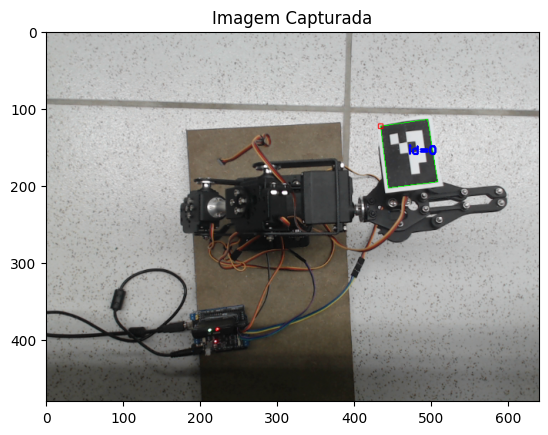

(434,
 123,
 495,
 114,
 508,
 195,
 444,
 203,
 471,
 159,
 103.24727599312246,
 None,
 640,
 480)

In [6]:
camera.get_aruco0_positions(plot_image=True)

Testando posções para:  0.2 0.2


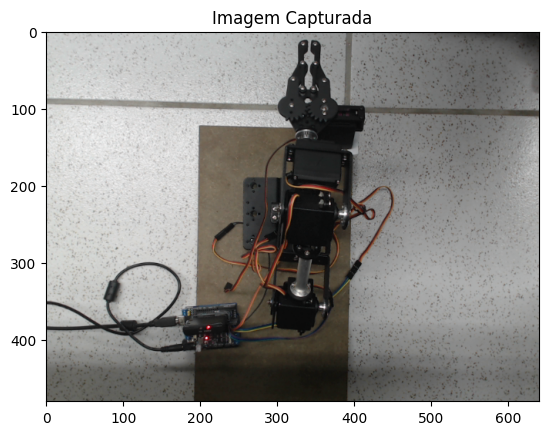

In [ ]:
from utils.train_data import get_data_train_inike

data = get_data_train_inike(
    robot, camera, 
    x_range = (-0.15,0.15), # Entre 0 e 30 cm
    y_range= (-0.15, 0.15), # Entre 0 e 30 cm
    step=5
)

In [8]:
robot.reset()

Comando enviado: 0:80, 1:130, 2:0, 3:100


In [15]:
from utils.functions import ikine
import math

positions = ikine([0.05, 0.0, 0.12], 0.1, 0.124, 0.06)
positions

[0.0, 2.9140582748489705, -2.136133807177682, -0.6033915424718554, 0, 0]

In [13]:
import numpy as np

def normalize_angle(angle_rad):
    """
    Normaliza um ângulo dado em radianos para o intervalo [0, 180] graus.
    """
    # Converte o ângulo para graus
    angle_deg = np.degrees(angle_rad)
    
    # Garante que o ângulo está no intervalo [0, 180]
    if angle_deg < 0:
        angle_deg += 360
    if angle_deg > 180:
        angle_deg -= 360

    return abs(angle_deg)

# Mapear para cada valor retornado pela função ikine
def map_ikine(theta_target):
    """
    Mapeia os valores das juntas para o intervalo [0, 180] graus.
    """
    return [normalize_angle(theta) for theta in theta_target]



In [16]:
map_ikine(positions)

[0.0, 166.96324040401967, 122.39145162649356, 34.57178877752608, 0.0, 0.0]

In [17]:
camera.release()
robot.close()